```python
    __status__ = "Spam classification has not implemented yet."
```

# Programming Exercise 6: Support Vector Machines
## Machine Learning
## Introduction
In this exercise, you will be using support vector machines (SVMs) to build a spam classifier. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics. 

### Files included in this exercise
* `ex6.ipynb` - Python script that steps you through the exercise. 
* `ex6_utils.py` - All necessary functions, classes and solutions for the exercises.
* `ex6_data/` - Include all data needed for the exercises.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ex6_utils import *
import scipy.io as io
import scipy.optimize as opt
from IPython.display import *
from sklearn import svm
import re

# Setup environment variables
%load_ext autoreload
%autoreload 2
%matplotlib inline

## 1 Support Vector Machines
In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs. In the next half of the exercise, you will be using support vector machines to build a spam classifier.
The provided script, will help you step through the first half of the exercise.
### 1.1 Example Dataset 1
We will begin by with a 2D example dataset which can be separated by a linear boundary. The script will plot the training data (<b>Figure 1</b>). In this dataset, the positions of the positive examples (indicated with $+$) and the negative examples (indicated with $o$) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example $+$ on the far left at about ($0.1$, $4.1$). As part of this exercise, you will also see how this outlier affects the SVM decision boundary.

<img src="figure1.png" height="40%" width="40%">

Loading and Visualizing Data ...


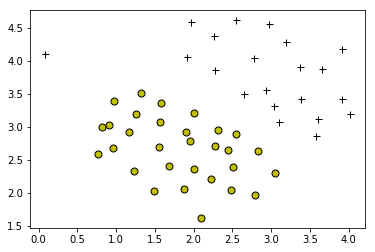

	Figure 1: Example Dataset 1


In [9]:
#  =============== Part 1: Loading and Visualizing Data ================
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot the data.

print('Loading and Visualizing Data ...')
# Load from ex6data1: 
data = io.loadmat('ex6_data/ex6data1.mat')
# Plot training data
X = data['X']
y = data['y']
_ = plotData(X,y)
plt.show()
print('\tFigure 1: Example Dataset 1')

 In this part of the exercise, you will try using different values of the $C$ parameter with SVMs. Informally, the $C$ parameter is a positive value that controls the penalty for misclassified training examples. A large $C$ parameter tells the SVM to try to classify all the examples correctly. $C$ plays a role similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.
 
Your task is to try different values of $C$ on this dataset. Specifically, you should change the value of $C$ in the script to $C = 400$ and run the SVM training again. When $C = 400$, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data (<b>Figure 3</b>).


Training Linear SVM ...


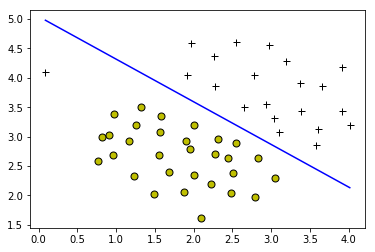

Figure 2: SVM Decision Boundary with C = 1.





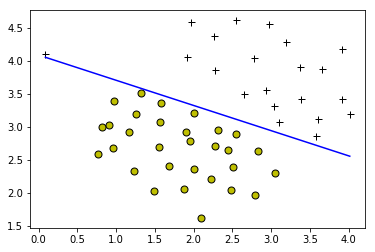

Figure 3: SVM Decision Boundary with C = 1000.


In [11]:
from sklearn import svm
#  ==================== Part 2: Training Linear SVM ====================
#   The following code will train a linear SVM on the dataset and plot the decision boundary learned.

print('\nTraining Linear SVM ...')
# You should try to change the C value below and see how the decision boundary varies (try C = 1000)
C = np.array([1, 1000])
model1 = svm.LinearSVC(C=C[0],penalty='l2', loss='hinge', max_iter=1000)
model1.fit(X, y.ravel())

model2 = svm.LinearSVC(C=C[1],penalty='l2', loss='hinge', max_iter=1000)
model2.fit(X, y.ravel())

fig1 = visualizeBoundaryLinear(X, y, model1)
plt.show()
print('Figure 2: SVM Decision Boundary with C = %i.\n\n\n' %int(C[0]))
fig2 = visualizeBoundaryLinear(X, y, model2)
plt.show()
print('Figure 3: SVM Decision Boundary with C = %i.' %int(C[1]))

### 1.2 SVM with Gaussian Kernels
In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable.
#### 1.2.1 Gaussian Kernel
To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples, ($x^{(i)} , x^{(j)}$). The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to $0$) as the examples are further apart.

You should now complete the code in <b>gaussian_kernel</b> to compute the Gaussian kernel between two examples, ($x^{(i)} , x^{(j)}$). The Gaussian kernel function is defined as:

$$
K_{gaussian}(x^{(i)} , x^{(j)}) = \exp{(-\frac{\Vert x^{(i)} - x^{(j)} \Vert}{2\sigma^2})} = 
    \exp{(-\frac{\sum^{n}_{k=1}{(x^{(i)}_k - x^{(j)}_k)^2}}{2\sigma^2})}
$$

Once you’ve completed the function <b>gaussian_kernel</b>, the script will test your kernel function on two provided examples and you should expect to see a value of $0.324652$.

In [12]:
#  =============== Part 3: Implementing Gaussian Kernel ===============
print('Evaluating the Gaussian Kernel ...\n')

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], \ sigma = %f :' \
      %sigma +'%f' %sim + '\n\t\t\t\t(for sigma = 2, this value should be about 0.324652)\n')

Evaluating the Gaussian Kernel ...

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], \ sigma = 2.000000 :0.324652
				(for sigma = 2, this value should be about 0.324652)



#### 1.2.2 Example Dataset 2
The next part in will load and plot dataset 2 (<b>Figure 4</b>). From the figure, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset.
If you have correctly implemented the Gaussian kernel function, the script will proceed to train the SVM with the Gaussian kernel on this dataset. 
<b>Figure 5</b> shows the decision boundary found by the SVM with a Gaussian  kernel. The decision boundary is able to separate most of the positive and negative examples correctly and follows the contours of the dataset well.

Loading and Visualizing Data ...



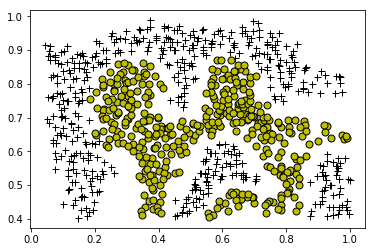

	Figure 4: Example Dataset 2


In [21]:
#  =============== Part 4: Visualizing Dataset 2 ================
#  The following code will load the next dataset into your environment and 
#  plot the data. 

print('Loading and Visualizing Data ...\n')

# Load from ex6data2: 
# You will have X, y in your environment
data = io.loadmat('ex6_data/ex6data2.mat')
X = data['X']
y = data['y']

# Plot training data
plotData(X, y)
plt.show()
print('\tFigure 4: Example Dataset 2')

Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...



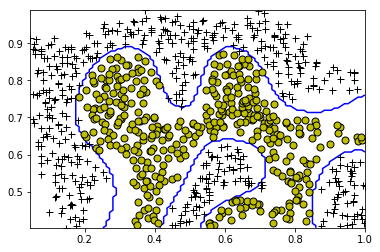

In [23]:
#  ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
#  After you have implemented the kernel, we can now use it to train the SVM classifier.
print('Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...\n')

# SVM Parameters
C = 1

sim = gaussianKernel(X[:,0], X[:,1], sigma)
model = svm.SVC(C=10, gamma=30, probability=True)
model.fit(X, y.ravel())
p = model.predict_log_proba(X)
_ = visualizeBoundary(X, y, model)

#### 1.2.3 Example Dataset 3
In this part of the exercise, you will gain more practical skills on how to usea SVM with a Gaussian kernel. The next part of ex6.m will load and display a third dataset (<b>Figure 6</b>). You will be using the SVM with the Gaussian kernel with this dataset. 
In the provided dataset, `ex6data3.mat`, you are given the variables $X, y, Xval, yval$. The provided code trains the SVM classifier using the training set ($X, y$) using parameters loaded from $dataset3Params$.

Your task is to use the cross validation set $Xval, yval$ to determine the best $C$ and $\sigma$ parameter to use. You should write any additional code necessary to help you search over the parameters $C$ and $\sigma$. For both $C$ and $\sigma$, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).

Note that you should try all possible pairs of values for $C$ and $\sigma$ (e.g., $C = 0.3$ and $\sigma = 0.1$). 
For example, if you try each of the 8 values listed above for $C$ and for $\sigma^2$, you would end up training and evaluating (on the cross validation set) a total of $8^2 = 64$ different models. 
After you have determined the best $C$ and $\sigma$ parameters to use, you should modify the code in <b>dataset3Params</b>, filling in the best parameters you found. For our best parameters, the SVM returned a decision boundary shown in <b>Figure 7</b>.

Loading and Visualizing Data ...


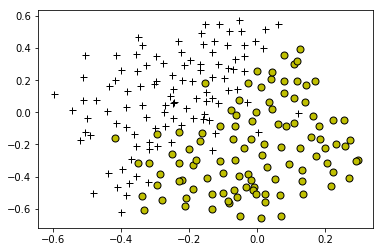

	Figure 6: Example Dataset 3


In [24]:
#  =============== Part 6: Visualizing Dataset 3 ================
#  The following code will load the next dataset into your environment and 
#  plot the data. 

print('Loading and Visualizing Data ...')

# % Load from ex6data3: 
# % You will have X, y in your environment
data = io.loadmat('ex6_data/ex6data3.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
# load('ex6data3.mat');
_ = plotData(X, y)
plt.show()
print('\tFigure 6: Example Dataset 3')

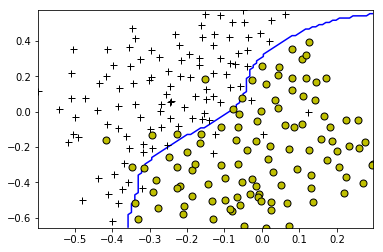

Figure 7: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)


In [25]:
#  ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

#  This is a different dataset that you can use to experiment with. Try
#  different values of C and sigma here.


# Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xval, yval)


# % Train the SVM
model = svm.SVC(C=C, gamma=sigma)
model.fit(X, y.ravel())
_ = visualizeBoundary(X, y, model)
plt.show()
print('Figure 7: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)')




## 2 Spam Classification
Many email services today provide spam filters that are able to classify emails
into spam and non-spam email with high accuracy. In this part of the exer-
cise, you will use SVMs to build your own spam filter.
You will be training a classifier to classify whether a given email, x, is
spam (y = 1) or non-spam (y = 0). In particular, you need to convert each
email into a feature vector x ∈ R n . The following parts of the exercise will
walk you through how such a feature vector can be constructed from an
email.
Throughout the rest of this exercise, you will be using the the script
ex6 spam.m. The dataset included for this exercise is based on a a subset of
the SpamAssassin Public Corpus. 3 For the purpose of this exercise, you will
only be using the body of the email (excluding the email headers).
### 2.1 Preprocessing Emails
> Anyone knows how much it costs to host a web portal ?

> Well, it depends on how many visitors youre expecting. This can be anywhere from less than 10 bucks a month to a couple of $100. You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 if youre running something big..  

> To unsubscribe yourself from this mailing list, send an email to: 
groupname-unsubscribe@egroups.com

Before starting on a machine learning task, it is usually insightful to
take a look at examples from the dataset. Figure 8 shows a sample email
that contains a URL, an email address (at the end), numbers, and dollar
amounts. While many emails would contain similar types of entities (e.g.,
numbers, other URLs, or other email addresses), the specific entities (e.g.,
the specific URL or specific dollar amount) will be different in almost every
email. Therefore, one method often employed in processing emails is to
“normalize” these values, so that all URLs are treated the same, all numbers
are treated the same, etc. For example, we could replace each URL in the
email with the unique string “httpaddr” to indicate that a URL was present.
This has the effect of letting the spam classifier make a classification decision
based on whether any URL was present, rather than whether a specific URL
was present. This typically improves the performance of a spam classifier,
since spammers often randomize the URLs, and thus the odds of seeing any
particular URL again in a new piece of spam is very small.
In processEmail.m, we have implemented the following email prepro-
cessing and normalization steps:
* Lower-casing:
The entire email is converted into lower case, so
that captialization is ignored (e.g., IndIcaTE is treated the same as
Indicate).
* Stripping HTML: All HTML tags are removed from the emails.
Many emails often come with HTML formatting; we remove all the
HTML tags, so that only the content remains.
* Normalizing URLs: All URLs are replaced with the text “httpaddr”.
* Normalizing Email Addresses:
with the text “emailaddr”.
* Normalizing Numbers:
“number”.
All email addresses are replaced
All numbers are replaced with the text
* Normalizing Dollars: All dollar signs ($) are replaced with the text
“dollar”.
* Word Stemming: Words are reduced to their stemmed form. For ex-
ample, “discount”, “discounts”, “discounted” and “discounting” are all
replaced with “discount”. Sometimes, the Stemmer actually strips off
additional characters from the end, so “include”, “includes”, “included”,
and “including” are all replaced with “includ”.
* Removal of non-words: Non-words and punctuation have been re-
moved. All white spaces (tabs, newlines, spaces) have all been trimmed
to a single space character.

The result of these preprocessing steps is shown in Figure 9. While pre-
processing has left word fragments and non-words, this form turns out to be
much easier to work with for performing feature extraction.

In [20]:
## ==================== Part 1: Email Preprocessing ====================
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in processEmail.m to produce a word indices vector
#  for a given email.
from ex6_utils import readFile

print('Preprocessing sample email (emailSample1.txt)');

# Extract Features
file_contents = readFile('emailSample1.txt')



Preprocessing sample email (emailSample1.txt)
Unable to open emailSample1.txt


In [39]:
import re

processEmail("1 2 3 <<<a>/hed> dasda </b>")

'number number number << /hed> dasda  '

In [106]:
len(vocabList)

1899

In [114]:
from ex6_utils import getVocabList
import re
from nltk.stem.porter import PorterStemmer

def processEmail(email_contents):
    """ This function preprocesses the body of an email and 
        returns a list of word_indices.

        Arguments:
        - email_contents: str -- the body of an email

        Returns:
        - word_indices: list -- including indices of the words
        contained in the email
    """
    # Load Vocabulary
    vocabList = getVocabList()
    
    # Init return value
    word_indices = []
    
    # ========================== Preprocess Email ===========================
    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers <Not converted yet!>

    # hdrstart = strfind(email_contents, ([char(10) char(10)]));
    # email_contents = email_contents(hdrstart(1):end);

    # Lower case 
    email_contents = email_contents.lower()
    
    # Strip all HTML -- Need to understand more!
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents = re.sub('<[^<>]+>', ' ', email_contents)
    
    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.sub('[0-9]+', 'number', email_contents)

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.sub('(http|https)://[^\s]*', 'httpaddr', email_contents)

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_contents)

    # Handle $ sign
    email_contents = re.sub('[$]+', 'dollar', email_contents)

    # ========================== Tokenize Email ===========================

    # Output the email to screen as well
    print('\n==== Processed Email ====\n\n')

    # Process file
    # Tokenize and also get rid of any punctuation
    strings = re.split('[@$/#.-:&*+=\[\]?!(){},''">_<;%\n\r ]+', file_contents)
    
    for string in strings:
        # Remove any non alphanumeric characters
        string = re.sub('[^a-zA-Z0-9]', '', string)
        
        # Stem the word
        # (the porterStemmer sometimes has issues, so we use a try catch block)
        string = PorterStemmer().stem(string)
        
        if len(string) > 0:
            for i in range(len(vocabList)):
                if (vocabList[i+1] == string):
                    word_indices.append(i+1)
    
    return word_indices

In [119]:
word_indices = processEmail(file_contents)
word_indices



==== Processed Email ====




[86,
 916,
 794,
 1077,
 883,
 370,
 1699,
 790,
 1822,
 1831,
 883,
 431,
 1171,
 794,
 1002,
 1895,
 592,
 1676,
 238,
 162,
 89,
 688,
 945,
 1663,
 1062,
 1699,
 375,
 1162,
 1893,
 1510,
 798,
 1882,
 309,
 1182,
 1237,
 810,
 1895,
 1440,
 1547,
 181,
 1758,
 1896,
 688,
 1676,
 992,
 961,
 1477,
 71,
 530,
 1699,
 309]

In [33]:
def processEmail(email_contents)
    
    #  Load Vocabulary
    vocabList = getVocabList()

    # Init return value
    word_indices = {}

    # ========================== Preprocess Email ===========================
    # Lower case
    email_contents = email_contents.lower()

    # % Strip all HTML
    # % Looks for any expression that starts with < and ends with > and replace
    # % and does not have any < or > in the tag it with a space
    email_contents = re.sub('<[^<>]+>', ' ', email_contents)


    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.sub('[0-9]+', 'number', email_contents)

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.sub('(http|https)://[^\s]*', 'httpaddr', email_contents)


    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_contents)

    # Handle $ sign
    email_contents = re.sub('[$]+', 'dollar', email_contents)

    # ========================= Tokenize Email ===========================

    # Output the email to screen as well
    print('==== Processed Email ====\n\n')

    # Process file
    l = 0
    #% Tokenize and also get rid of any punctuation
    email_contents = re.split(r'[@$/#.-:&\*\+=\[\]?!(){},\'\'\">_<;%\s\n\r\t]+', 
                              email_contents)
    for token in email_contents:

        # Remove any non alphanumeric characters
        token = re.sub('[^a-zA-Z0-9]', '', token)

        #     % Stem the word 
        #     % (the porterStemmer sometimes has issues, so we use a try catch block)
        token = PorterStemmer().stem_word(token.strip())

        # Skip the word if it is too short
        if len(token) < 1:
            continue
        idx = vocabList[token] if token in vocabList else 0
        if idx > 0:
            word_indices.append(idx)

        # Print to screen, ensuring that the output lines are not too long
        if l + len(token) + 1 > 78:
            print("")
            l = 0
        print('{:s}'.format(token)),
        l = l + len(token) + 1
    return email_contents
        #     end
        #     fprintf('%s ', str);
        #     l = l + length(str) + 1;

        # end

    # % Print footer
    # fprintf('\n\n=========================\n');

    # end


==== Processed Email ====




In [27]:
print(email_contents)

['', 'anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host', 'a', 'web', 'portal', 'well', 'it', 'depends', 'on', 'how', 'many', 'visitors', 'you', 're', 'expecting', 'this', 'can', 'be', 'anywhere', 'from', 'less', 'than', 'number', 'bucks', 'a', 'month', 'to', 'a', 'couple', 'of', 'dollarnumber', 'you', 'should', 'checkout', 'httpaddr', 'or', 'perhaps', 'amazon', 'ecnumber', 'if', 'youre', 'running', 'something', 'big', 'to', 'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list', 'send', 'an', 'email', 'to', 'emailaddr', '']


In [6]:
# function word_indices = processEmail(email_contents)
# %PROCESSEMAIL preprocesses a the body of an email and
# %returns a list of word_indices 
# %   word_indices = PROCESSEMAIL(email_contents) preprocesses 
# %   the body of an email and returns a list of indices of the 
# %   words contained in the email. 
# %

# % Load Vocabulary
vocabList = getVocabList()
# vocabList = getVocabList();

# % Init return value
# word_indices = [];

# ========================== Preprocess Email ===========================

# Find the Headers ( \n\n and remove )
# Uncomment the following lines if you are working with raw emails with the
# full headers

# Lower case
email_contents = email_contents.lower()

# % Strip all HTML
# % Looks for any expression that starts with < and ends with > and replace
# % and does not have any < or > in the tag it with a space
e = re.search(r'<<>+>', email_contents)
# email_contents = regexprep(email_contents, '<[^<>]+>', ' ');

# % Handle Numbers
# % Look for one or more characters between 0-9
# email_contents = regexprep(email_contents, '[0-9]+', 'number');

# % Handle URLS
# % Look for strings starting with http:// or https://
# email_contents = regexprep(email_contents, ...
#                            '(http|https)://[^\s]*', 'httpaddr');

# % Handle Email Addresses
# % Look for strings with @ in the middle
# email_contents = regexprep(email_contents, '[^\s]+@[^\s]+', 'emailaddr');

# % Handle $ sign
# email_contents = regexprep(email_contents, '[$]+', 'dollar');


# % ========================== Tokenize Email ===========================

# % Output the email to screen as well
# fprintf('\n==== Processed Email ====\n\n');

# % Process file
# l = 0;

# while ~isempty(email_contents)

#     % Tokenize and also get rid of any punctuation
#     [str, email_contents] = ...
#        strtok(email_contents, ...
#               [' @$/#.-:&*+=[]?!(){},''">_<;%' char(10) char(13)]);
   
#     % Remove any non alphanumeric characters
#     str = regexprep(str, '[^a-zA-Z0-9]', '');

#     % Stem the word 
#     % (the porterStemmer sometimes has issues, so we use a try catch block)
#     try str = porterStemmer(strtrim(str)); 
#     catch str = ''; continue;
#     end;

#     % Skip the word if it is too short
#     if length(str) < 1
#        continue;
#     end

#     % Look up the word in the dictionary and add to word_indices if
#     % found
#     % ====================== YOUR CODE HERE ======================
#     % Instructions: Fill in this function to add the index of str to
#     %               word_indices if it is in the vocabulary. At this point
#     %               of the code, you have a stemmed word from the email in
#     %               the variable str. You should look up str in the
#     %               vocabulary list (vocabList). If a match exists, you
#     %               should add the index of the word to the word_indices
#     %               vector. Concretely, if str = 'action', then you should
#     %               look up the vocabulary list to find where in vocabList
#     %               'action' appears. For example, if vocabList{18} =
#     %               'action', then, you should add 18 to the word_indices 
#     %               vector (e.g., word_indices = [word_indices ; 18]; ).
#     % 
#     % Note: vocabList{idx} returns a the word with index idx in the
#     %       vocabulary list.
#     % 
#     % Note: You can use strcmp(str1, str2) to compare two strings (str1 and
#     %       str2). It will return 1 only if the two strings are equivalent.
#     %

#     for i = 1:length(vocabList)
#         if strcmp(vocabList{i}, str) == 1
#             word_indices = [word_indices; i];
#         end
#     end
    








#     % =============================================================


#     % Print to screen, ensuring that the output lines are not too long
#     if (l + length(str) + 1) > 78
#         fprintf('\n');
#         l = 0;
#     end
#     fprintf('%s ', str);
#     l = l + length(str) + 1;

# end

# % Print footer
# fprintf('\n\n=========================\n');

# end


NameError: name 'email_contents' is not defined

In [45]:
e = re.search('\n', email_contents)
e

<_sre.SRE_Match object; span=(55, 56), match='\n'>